# mpLP reformulation of an energy systems MILP

__author__ = "Rahul Kakodkar"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Rahul Kakodkar", "Dustin Kenefake", "Efstratios N. Pistikopoulos"]
__license__ = "Open"
__version__ = "1.0.0"
__maintainer__ = "Rahul Kakodkar"
__email__ = "cacodcar@tamu.edu"
__status__ = "Production"


## Problem Statement

In the following example a multi-scale energy systems mixed integer linear program (MILP) is reformulated as a mulitparametric linear program (mpLP)

## Nomenclature

*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t


*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{P}^{uncertain-cap}$ - set of processes with uncertain capacity

$\mathcal{P}^{uncertain-capex}$ - set of processes with uncertain capital expenditure

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making


*Continuous Variables*


$P_{p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$




*Binary Variables*


$X^P_{p,t}$ - network binary for production process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$X^S_{r,t}$ - network binary for inventory of resource r  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$



*Parametric Variables*


$\alpha_{p}$ - uncertainty in production capacity of process p $\in$ $\mathcal{P}^{uncertain-cap}$

$\beta_{r}$ - uncertainty in demand for resource r $\in$ $\mathcal{R}^{demand}$

$\gamma_{r}$ - uncertainty in purchase price for resource r $\in$ $\mathcal{R}^{cons}$

$\delta_{r}$ - uncertainty in consumption availability for resource r $\in$ $\mathcal{R}^{cons}$

$\epsilon_{p}$ - uncertainty in cost of technology for process p $\in$ $\mathcal{P}^{uncertain-capex}$



*Parameters*


$Cap^{P-max}_{p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Capex_{p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$




# MILP Formulation

Given is a general MILP modeling and optimization framework for simultaneous network design and scheduling.




\begin{equation}
    min \sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} Capex_{p,t} \times Cap^P_{p,t} + \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}}  Price_{r,t}  \times C_{r,t} + \sum_{t \in \mathcal{T}^{sch}} \sum_{p \in \mathcal{P}}  Vopex_{r,t} \times P_{r,t} 
\end{equation}


\begin{equation}
    Cap^S_{r,t} \leq Cap^{S-max}_{r,t} \times X^S_{r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
    Cap^P_{p,t} \leq Cap^{P-max}_{p,t} \times X^P_p  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation} 

\begin{equation}
    P_{p,t} \leq Cap^{P}_{p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
    Inv_{r,t} \leq Cap^{S}_{r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
    - S_{r,t} \leq - D_{r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    C_{r,t} \leq C^{max}_{r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}


\begin{equation}
    - S_{r,t} + \sum_{p \in \mathcal{P}} P_{p,t} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{sell}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    -Inv_{r,t} + \sum_{p \in \mathcal{P}} P_{p,t} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{stored}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    \sum_{p \in \mathcal{P}} P_{p,t} \times \eta(p,r) + C_{r,t} = 0 \hspace{1cm} \forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    S_{r,t}, C_{r,t}, Inv_{r,t}, P_{p,t}, Cap^P_p, Cap^S_r \in R_{\geq 0}
\end{equation}




## mpLP reformulation

Reformulated as an mpLP


\begin{equation}
    min \hspace{1cm} \sum_{p \in \mathcal{P}} Capex_p \times \epsilon_p \times P_p + \sum_{r \in \mathcal{R}^{cons}} C_r \times \gamma_r 
\end{equation}


\begin{equation}
    Inv_r \leq Cap^{S-max}_r \hspace{1cm} \forall r \in \mathcal{R}^{stored}
\end{equation}

\begin{equation}
    - S_r \leq - D_r \times \beta_r \hspace{1cm} \forall r \in \mathcal{R}^{demand}
\end{equation}

\begin{equation}
    C_r \leq C^{max}_r \times \delta_r \hspace{1cm} \forall r \in \mathcal{R}^{cons} 
\end{equation}

\begin{equation}
    P_p \leq Cap^{P-max}_p \times \alpha_p \hspace{1cm} \forall p \in \mathcal{P}
\end{equation} 

\begin{equation}
    - S_{r} + \sum_{p \in \mathcal{P}} P_{p} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{sell}
\end{equation}

\begin{equation}
    - Inv_{r} + \sum_{p \in \mathcal{P}} P_{p} \times \eta(p,r) = 0 \hspace{1cm} \forall r \in \mathcal{R}^{stored}
\end{equation}

\begin{equation}
    \sum_{p \in \mathcal{P}} P_{p} \times \eta(p,r) + C_{r} = 0 \hspace{1cm} \forall r \in \mathcal{R}^{cons}
\end{equation}

\begin{equation}
    \alpha_p \in A_p \hspace{1cm} \forall p \in \mathcal{P}
\end{equation}

\begin{equation}
    \beta_r \in B_r \hspace{1cm} \forall r \in \mathcal{R}^{demand}
\end{equation}

\begin{equation}
    \gamma_r \in \Gamma_r \hspace{1cm} \forall r \in \mathcal{R}^{cons}
\end{equation}

\begin{equation}
    \delta_r \in \Delta_r \hspace{1cm} \forall r \in \mathcal{R}^{cons}
\end{equation}

\begin{equation}
    \epsilon_p \in E_p \hspace{1cm} \forall p \in \mathcal{P}
\end{equation}


\begin{equation}
    S_r, C_r, Inv_r, P_p \in R_{\geq 0}
\end{equation}


## Example Problem


\begin{equation}
    p \in \{LI_c, LI_d, WF, PV\} 
\end{equation}


\begin{equation}
    r \in \{charge, power, wind, solar\} 
\end{equation}



\begin{equation}
    min \hspace{1cm} \left[\begin{matrix}1302\\0\\990\\567\end{matrix}\right]^T \left[\begin{matrix}P_{LI_c}\\P_{LI_d}\\P_{WF}\\P_{PV}\end{matrix}\right]
\end{equation}



\begin{equation}
    I_3\left[\begin{matrix}Inv_{charge}\\C_{wind}\\C_{solar}\\P_{LI_c}\\P_{LI_d}\end{matrix}\right] \leq \left[\begin{matrix} 100\\100\\100\\100\\100\end{matrix}\right]
\end{equation}



\begin{equation}
    I_3\left[\begin{matrix}-S_{power}\\P_{WF}\\P_{PV}\end{matrix}\right] \leq \left[\begin{matrix}-300 & 0 & 0\\0 & 100 & 0\\0 & 0 & 100\end{matrix}\right] \left[\begin{matrix}\beta_{power}\\ \alpha_{WF}\\\alpha_{PV}\end{matrix}\right]
\end{equation}



\begin{equation}
    I_4\left[\begin{matrix} - Inv_{charge} \\ -S_{power} \\ C_{wind} \\ C_{solar} \end{matrix}\right] + \left[\begin{matrix}0.89 & -1 & 0 & 0\\-1 & 1 & 0.85 & 0.75\\0 & 0 & -1 & 0\\0 & 0 & 0 & -1\end{matrix}\right] \left[\begin{matrix}P_{LI_c}\\P_{LI_d}\\P_{WF}\\P_{PV}\end{matrix}\right] = 0
\end{equation}



\begin{equation}
    \alpha_p \in \mathcal{A}_p \hspace{1cm} \forall p \in \{WF, PV\} 
\end{equation}

\begin{equation}
    \beta_r \in \mathcal{B}_r \hspace{1cm} \forall r \in \{Power\} 
\end{equation}

$\textbf{Import modules}$

In [1]:
import sys
sys.path.append('../../src')

In [2]:
from energiapy.components.result import Result
# import polytope as pt
from ppopt.plot import parametric_plot
from ppopt.mp_solvers.solve_mpqp import solve_mpqp, mpqp_algorithm
from ppopt.mplp_program import MPLP_Program
from ppopt.mpqp_program import MPQP_Program
import numpy
import pandas
import sympy
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.plot import plot_results, plot_scenario
from energiapy.model.formulate import formulate, Constraints, Objective, ModelClass
from energiapy.components.scenario import Scenario
from energiapy.components.location import Location
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.material import Material
from energiapy.components.temporal_scale import TemporalScale
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.utils.math_utils import min_max, normalize
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt 



In [3]:
coord_houston = (29.56999969482422, -95.05999755859375)
weather_houston = pandas.read_csv('../data/weather_houston.csv', index_col=0)
weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)

solar_houston = solar_power_output(data= weather_houston, coord=coord_houston, sam = 'cecmod', module_params= 'Canadian_Solar_Inc__CS5P_220M', 
                                   inverter = 'cecinverter', inverter_params= 'ABB__MICRO_0_25_I_OUTD_US_208__208V_', 
                                   temperature_params= 'open_rack_glass_glass', aoi_model= 'no_loss', ac_model= 'sandia', spectral_model= 'no_loss')

wind_houston_ve = wind_power_output(data= weather_houston, roughness_length= 0.1, turbine_type= 'V100/1800', hub_height= 92, 
                                 wind_speed_model= 'logarithmic', density_model = 'ideal_gas', temperature_model = 'linear_gradient', 
                                 power_output_model = 'power_coefficient_curve', density_correction = True, obstacle_height = 0, 
                                 observation_height = 10)

wind_houston_en = wind_power_output(data= weather_houston, roughness_length= 0.1, turbine_type= 'E-126/4200', hub_height= 92, 
                                 wind_speed_model= 'logarithmic', density_model = 'ideal_gas', temperature_model = 'linear_gradient', 
                                 power_output_model = 'power_coefficient_curve', density_correction = False, obstacle_height = 0, 
                                 observation_height = 10)

wind_houston_ge = wind_power_output(data= weather_houston, roughness_length= 0.1, turbine_type= 'GE120/2750', hub_height= 92, 
                                 wind_speed_model= 'logarithmic', density_model = 'ideal_gas', temperature_model = 'linear_gradient', 
                                 power_output_model = 'power_coefficient_curve', density_correction = False, obstacle_height = 0, 
                                 observation_height = 10)
### Demand data

# Get [hourly power demand data](https://www.ercot.com/gridinfo/load/load_hist)  for Houston from ERCOT Coastal region
ercot = pandas.read_csv('../data/ercot.csv', index_col=0)
ercot.index = pandas.to_datetime(ercot.index, utc = True)
ercot.loc['2016-11-06 23:00:00'] = ercot.loc['2016-11-06 22:00:00'] #random missing value



C:\Users\cacodcar\AppData\Local\Temp\ipykernel_22792\422780675.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)
C:\Users\cacodcar\AppData\Local\Temp\ipykernel_22792\422780675.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ercot.index = pandas.to_datetime(ercot.index, utc = True)


In [4]:
help(wind_power_output)

Help on function wind_power_output in module energiapy.conversion.windmill:

wind_power_output(data: pandas.core.frame.DataFrame, roughness_length: float = 0.1, turbine_type: str = 'V100/1800', hub_height: float = 92, wind_speed_model: str = 'logarithmic', density_model: str = 'ideal_gas', temperature_model: str = 'linear_gradient', power_output_model: str = 'power_coefficient_curve', density_correction: bool = True, obstacle_height: float = 0, observation_height: float = 10)
    Calculates wind power output using weather data
    Relevant factors include wind speeds (m/s), temperature (K), and pressure(Pa)
    
    Args:
        data (pandas.DataFrame): weather data input with wind_speed, air_temperature, surface_pressure
        roughness_length (float, optional): Defaults to 0.1.
        turbine_type (str, optional): Defaults to 'V100/1800'.
        hub_height (float, optional): Defaults to 92.
        wind_speed_model (str, optional): Defaults to 'logarithmic'.
        density_mode

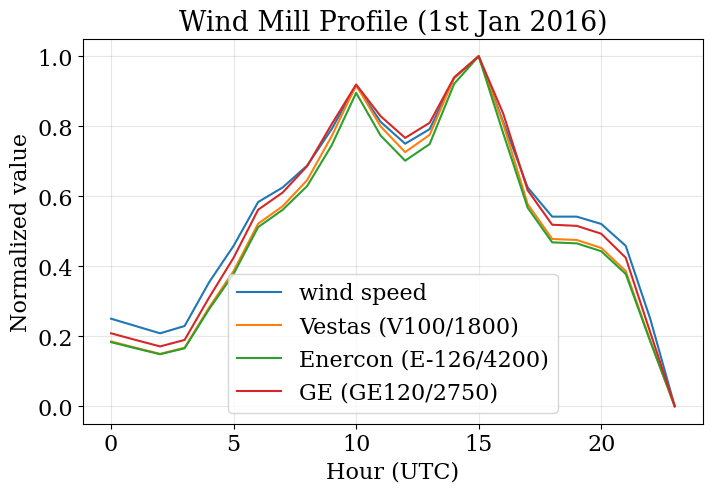

In [5]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(8,5))
# ax.plot(x_, y_, linewidth=0.5, color=color)
ax.plot(list(range(24)), min_max(weather_houston['wind_speed'][:24]), label = 'wind speed')
ax.plot(list(range(24)), min_max(wind_houston_ve[:24]), label = 'Vestas (V100/1800)')
ax.plot(list(range(24)), min_max(wind_houston_en[:24]), label = 'Enercon (E-126/4200)')
ax.plot(list(range(24)), min_max(wind_houston_ge[:24]), label = 'GE (GE120/2750)')



# ax = axis_formatter(axes=ax, xcord=x_, axis_labels='M')
plt.title(f'Wind Mill Profile (1st Jan 2016)')
# ax.xaxis.set_ticks(list(results.keys()))
# ax.xaxis.set_ticklabels(['1', '1/2', '1/3', '1/4', '1/5', '0'])
plt.ylabel("Normalized value")
plt.xlabel("Hour (UTC)")
plt.legend()
plt.grid(alpha=0.3)
plt.rcdefaults()

In [6]:
solar = normalize(solar_houston)
wind = normalize(wind_houston_ve)
demand = normalize(ercot)


$\textbf{Define temporal scale}$


In [7]:
scales = TemporalScale(discretization_list=[1])
horizon = 1


$\textbf{Declare resources}$

In [8]:
Solar = Resource(name='Solar', cons_max=100, basis='MW', label='Solar Power')

Wind = Resource(name='Wind', cons_max=100, basis='MW', label='Wind Power')

Power = Resource(name='Power', basis='MW', label='Power generated', varying = [VaryingResource.UNCERTAIN_DEMAND], varying_bounds  = (min(demand['COAST']), 1))

# H2O = Resource(name='H2O', cons_max=100, basis='tons', label='Water', varying= [VaryingResource.UNCERTAIN_AVAILABILITY], varying_bounds= (0.3, 0.95))
H2O = Resource(name='H2O', cons_max=500, basis='tons', label='Water', price = 0.01)

O2 = Resource(name='O2', sell=True, basis='tons', label='Oxygen')

H2 = Resource(name='H2', basis='tons', label='Hydrogen',demand= True) #, varying = [VaryingResource.UNCERTAIN_DEMAND], varying_bounds  = (0.6, 0.8))

CH4 = Resource(name='CH4', cons_max=1000, price=0.345, basis='tons',
               label='Natural gas', varying=[VaryingResource.UNCERTAIN_PRICE])




$\textbf{Declare processes}$

In [9]:
LiI = Process(name='LiI', storage=Power, capex=1302, fopex=0, vopex=12,  prod_max=50,
              storage_loss=0.11,  label='Lithium-ion battery', basis='MW', store_max=100)

PEM = Process(name='PEM', conversion={Power: -1, H2: 0.3537, H2O: -3.1839}, capex=1550, fopex=0,
              vopex=11, prod_max=100, prod_min = 0, basis = 'tons', label = 'PEM' )

WF = Process(name='WF', conversion={Wind: -1, Power: 0.85}, capex=990, fopex=0, vopex=13,
             prod_max=100, label='Wind mill array', basis='MW', varying=[VaryingProcess.UNCERTAIN_CAPACITY], varying_bounds = (0, 1))

PV = Process(name='PV', conversion={Solar: -1, Power: 0.75}, capex=567, fopex=0, vopex=9,
             prod_max=100, label='Solar PV', basis='MW', varying=[VaryingProcess.UNCERTAIN_CAPACITY], varying_bounds= (0, 1))

NGCC = Process(name='NGCC', conversion={Power: 1, CH4: -0.108}, capex=2158928, fopex=53320, vopex=4090, prod_max=100, label='NGCC + 95% CC', varying_bounds= (0.6, 1))


$\textbf{Declare location(s)}$


In [10]:
region = Location(name='region', processes={
                  LiI, WF, PV, PEM}, scales=scales, label='some region')
#  WF

The combination of parameter data, locations, and transportation options generates a scenario. 

Scenarios are data sets that can be fed to models for analysis. 

In this case we are generating a scenario for the location houston. The scales need to be consistent.

In [11]:
example = Scenario(name='example', demand={region: {Power:100, H2: 20}}, network=region, scales=scales, label='example scenario')
# example = Scenario(name='example', demand={region: {Power: 200}}, network=region, scales=scales, label='example scenario')


In [12]:
matrix = formulate(scenario=example, model_class=ModelClass.MPLP)


The problem has the following variables:
Resource inventory level (Inv) x 1
Exact resource discharge (Sf) x 1
Uncertain resource discharge (S) x 1
Exact resource availability (Af) x 3
Uncertain resource availability (A) x 0
Exact resource price (Cf) x 3
Uncertain resource price (C) x 0
Exact process production (Pf) x 3
Uncertain process production (P) x 2
 For a total of 11 (8 fixed, and 3 uncertain)


In [13]:
example.b_df

,rhs
MB_H2(=),0.0
MB_H2O(=),0.0
MB_LiI_Power_stored(=),0.0
MB_Power(=),0.0
MB_Solar(=),0.0
MB_Wind(=),0.0
Inv_LiI_Power_stored(<),100.0
Sf_H2(>),-20.0
S_Power(>),0.0
Af_H2O(<),500.0


In [14]:
# example.b_df

In [15]:
example.F_df

,Th_Power,Th_PV,Th_WF
MB_H2(=),0.0,0.0,0.0
MB_H2O(=),0.0,0.0,0.0
MB_LiI_Power_stored(=),0.0,0.0,0.0
MB_Power(=),0.0,0.0,0.0
MB_Solar(=),0.0,0.0,0.0
MB_Wind(=),0.0,0.0,0.0
Inv_LiI_Power_stored(<),0.0,0.0,0.0
Sf_H2(>),0.0,0.0,0.0
S_Power(>),-100.0,0.0,0.0
Af_H2O(<),0.0,0.0,0.0


In [16]:
# example.c_df

In [17]:
# example.H_df

In [18]:
# example.CRa_df

In [19]:
# example.CRb_df

All the matrices can be accessed in matrix

In [20]:
# matrix

Pasting the backend here

In [21]:
# prog = MPLP_Program(matrix['A'], matrix['b'], matrix['c'], matrix['H'],
#                     matrix['CRa'], matrix['CRb'], matrix['F'], equality_indices=list(range(matrix['no_eq_cons'])))
# prog.solver.solvers['lp'] = 'gurobi'
# # prog.warnings()
# # prog.display_warnings()
# # prog.process_constraints()
# solution = solve_mpqp(prog, mpqp_algorithm.combinatorial)

In [22]:
solution = solve(matrix = matrix, interface = 'native', name = 'results_mplp', solver = 'ppopt') 


Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-14
[]


In [23]:
lp = formulate(scenario=example, constraints={Constraints.COST, Constraints.INVENTORY,
                 Constraints.PRODUCTION, Constraints.RESOURCE_BALANCE, Constraints.DEMAND}, objective = Objective.COST)#, objective=Objective.MAX_DISCHARGE, objective_resource = Power)

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint production mode
constraint inventory balance
constraint inventory network
constraint demand
objective cost


In [24]:
# lp.pprint()

In [25]:
lp.constraint_demand.pprint()

constraint_demand : specific demand for resources
    Size=1, Index=constraint_demand_index, Active=True
    Key                 : Lower : Body           : Upper : Active
    ('region', 'H2', 0) :  20.0 : S[region,H2,0] :  +Inf :   True


In [26]:
len(solution.critical_regions)

2

In [27]:
solution.critical_regions[0]

Critical region with active set [0, 1, 2, 3, 4, 5, 6, 7, 11, 13, 18]
The Omega Constraint indices are [0, 1, 2, 3, 4, 5]
The Lagrange multipliers Constraint indices are []
The Regular Constraint indices are [[0, 1, 4, 6, 7, 9, 10], [8, 9, 14, 16, 17, 20, 21]]
  x(θ) = Aθ + b 
 λ(θ) = Cθ + d 
  Eθ <= f
 A = [[ 1.77581843e-14 -1.38408849e-14  0.00000000e+00]
 [ 6.18055066e-15  8.05717283e-15  0.00000000e+00]
 [ 1.00000000e+02 -2.72801562e-13  0.00000000e+00]
 [ 1.77729132e-13 -1.22743898e-14  0.00000000e+00]
 [ 5.52154867e-13  1.00000000e+02  0.00000000e+00]
 [ 1.17647059e+02 -8.82352941e+01  0.00000000e+00]
 [ 1.04445561e-14 -5.07004959e-15  0.00000000e+00]
 [-1.22096752e-14 -4.89163226e-15  0.00000000e+00]
 [ 3.11338047e-14  1.74188569e-14  0.00000000e+00]
 [ 4.83945289e-13  1.00000000e+02  0.00000000e+00]
 [ 1.17647059e+02 -8.82352941e+01  0.00000000e+00]] 
 b = [[ 5.00000000e+01]
 [ 2.00000000e+01]
 [-2.27647147e-12]
 [ 1.80033927e+02]
 [ 1.03602842e-11]
 [ 1.41706997e+01]
 [ 3.02868

In [28]:
from ppopt.plot import parametric_plot
parametric_plot(solution)

Solution is not 2D, the dimensionality of the solution is 3


In [29]:
# solution.evaluate_objective(numpy.array([[0.4], [0.6], [0.6]]))
from ppopt.mplp_program import MPLP_Program
theta = numpy.array([0.5,0.8,0.5]).reshape(-1,1)
sol = solution.program.solve_theta(theta)
# sol, solution.evaluate_objective(theta)
# [0,1,2,3,4,5,7,12,14,21]

In [30]:
sol.sol

array([ 50.        ,  20.        ,  50.        , 180.03392706,
        80.        ,   2.40599378,   0.        ,  50.        ,
        56.54509471,  80.        ,   2.40599378])

In [31]:
sol.obj

array([[1375.07430025]])

In [32]:
solution.evaluate_objective(numpy.array([0.5,0.8,0.5]).reshape(-1,1))

array([[1375.07430025]])

In [33]:
import pickle

# Create a sample dictionary
my_dict = solution

# Specify the file name for the pickle file
file_name = "solution.pickle"

# Open the file in binary write mode
with open(file_name, 'wb') as file:
    # Dump the dictionary into the pickle file
    pickle.dump(my_dict, file)

print(f"Dictionary saved to {file_name}")

Dictionary saved to solution.pickle


In [34]:
sol
# ds = 20
# coordinates = []
# from itertools import product
# for i,j,k,l in product(numpy.linspace(0, 1, ds), numpy.linspace(0, 1, ds), numpy.linspace(0, 1, ds), numpy.linspace(0, 1, ds)):
#     m = solution.evaluate_objective(numpy.array([[i], [j], [k], [l]]))
#     if m is not None:
#         coordinates.append((i, j, k, l, m[0][0]))# 
print(solution.program.num_x())

11


In [35]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Sample data in 5D: (x, y, z, size, color)
# x = [coordinates[i][0] for i in range(len(coordinates))]
# y = [coordinates[i][1] for i in range(len(coordinates))]
# z = [coordinates[i][2] for i in range(len(coordinates))]
# size = [coordinates[i][4] for i in range(len(coordinates))]
# size = min_max(size)
# color = [coordinates[i][3] for i in range(len(coordinates))]


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Scatter plot with color mapping
# sc = ax.scatter(x, y, z, c=color, s=[i*50 for i in size], cmap='viridis', alpha=0.8)
# fig.colorbar(sc, ax=ax, label='Fifth Dimension')

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# plt.show()

In [36]:
ds = 20
coordinates = []
from itertools import product
for i,j,k in product(numpy.linspace(0, 1, ds), numpy.linspace(0, 1, ds), numpy.linspace(0, 1, ds)):
    l = solution.evaluate_objective(numpy.array([[i], [j], [k]]))
    if l is not None:
        coordinates.append((i, j, k, l[0][0]))
    # else:
        # coordinates.append((i, j, k, None))

Unique solutions

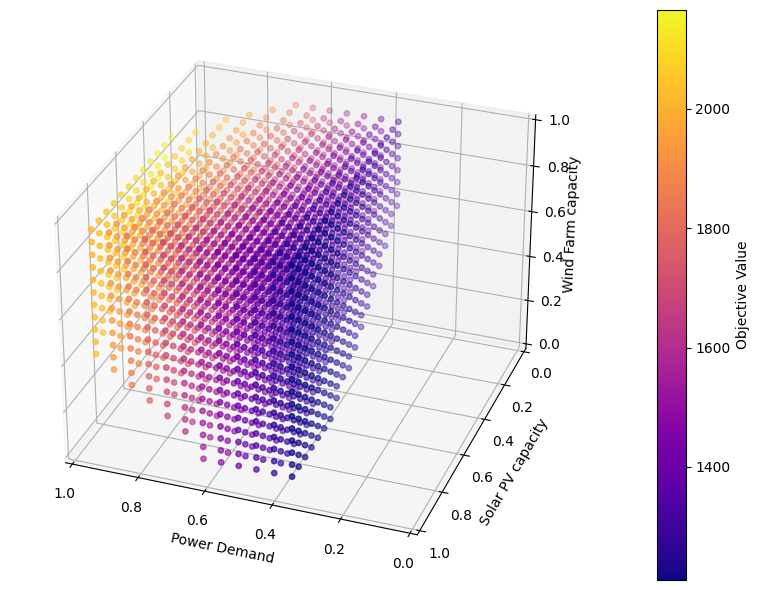

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Sample data: (x, y, z, color_value)
data = coordinates
fig = plt.figure(figsize= (8,6))
ax = fig.add_subplot(111, projection='3d')

x_vals, y_vals, z_vals, color_vals = zip(*data)

# Use color map to convert the color_value to a color
# norm = plt.Normalize(min(color_vals), max(color_vals))
# colors = cm.viridis(norm(color_vals))
colors = cm.viridis(color_vals)


scatter = ax.scatter(x_vals, y_vals, z_vals, c=color_vals, cmap='plasma', s=15)

# Add a color bar to show the mapping of color values
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Objective Value')

# ax.set_ylim(ax.get_xlim()[::-1])
# ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_ylim(ax.get_zlim()[::-1])

# ax.zorder = 
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.set_xlabel('Power Demand')
ax.set_ylabel('Solar PV capacity')
ax.set_zlabel('Wind Farm capacity')
ax.view_init(elev=30, azim=110)
ax.zaxis.labelpad=-1
plt.tight_layout()
plt.show()


In [38]:
# coordinates_meet = []
# coordinates_dontmeet = []
# for i,j,k in zip(demand['COAST'], solar['PV_Power'], wind['feedin_power_plant']):
#     l = solution.evaluate_objective(numpy.array([[i], [j], [k]]))
#     if l is not None:
#         coordinates_meet.append((i, j, k, l[0][0]))
#     else:
#         coordinates_meet.append((i, j, k, 0))
# objective = [i[3] for i in coordinates_meet]
# objective_null = [i[3] for i in coordinates_dontmeet]
# plt.plot(objective)
# # plt.plot(objective_null)
# plt.show()
# # plt.plot(demand)

In [39]:
solution.program.display_latex()

$$\min_{x}\left[\begin{matrix}0\\0\\0\\0.01\\0\\0\\12.0\\0\\11.0\\9.0\\13.0\end{matrix}\right]^T\left[\begin{matrix}x_{0}\\x_{1}\\x_{2}\\x_{3}\\x_{4}\\x_{5}\\x_{6}\\x_{7}\\x_{8}\\x_{9}\\x_{10}\end{matrix}\right]$$
$$\left[\begin{matrix}0 & -1.0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & -0.01 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 1.0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 1.0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 1.0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 1.0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1.0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.01 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.01\\-1.0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & -1.0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & -1.0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & -1.0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & -1.0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1.0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1.0\end{matrix}\right]\left[\begin{ma

$$\min_{x}\left[\begin{matrix}0\\0\\0\\0.01\\0\\0\\12.0\\0\\11.0\\9.0\\13.0\end{matrix}\right]^T\left[\begin{matrix}x_{0}\\x_{1}\\x_{2}\\x_{3}\\x_{4}\\x_{5}\\x_{6}\\x_{7}\\x_{8}\\x_{9}\\x_{10}\end{matrix}\right]$$
$$\left[\begin{matrix}0 & -1.0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & -0.01 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 1.0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 1.0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 1.0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 1.0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1.0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.01 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.01\\-1.0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & -1.0 & 0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & -1.0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & -1.0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & -1.0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1.0 & 0\\0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1.0\end{matrix}\right]\left[\begin{matrix}x_{0}\\x_{1}\\x_{2}\\x_{3}\\x_{4}\\x_{5}\\x_{6}\\x_{7}\\x_{8}\\x_{9}\\x_{10}\end{matrix}\right]\leq\left[\begin{matrix}-20.0\\0\\100.0\\100.0\\50.0\\50.0\\100.0\\0\\0\\0\\0\\0\\0\\0\\0\\0\end{matrix}\right]+\left[\begin{matrix}0 & 0 & 0\\-1.0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\\0 & 1.0 & 0\\0 & 0 & 1.0\\0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\end{matrix}\right]\left[\begin{matrix}\theta_{0}\\\theta_{1}\\\theta_{2}\end{matrix}\right]$$
$$\left[\begin{matrix}0.5774 & 0 & 0 & 0 & 0 & 0 & 0.5774 & -0.5774 & 0 & 0 & 0\\0 & -0.9428 & 0 & 0 & 0 & 0 & 0 & 0 & 0.3335 & 0 & 0\\0 & 0 & -0.4438 & 0 & 0 & 0 & -0.4438 & 0.395 & -0.4438 & 0.3329 & 0.3772\\0 & 0 & 0 & 0.2996 & 0 & 0 & 0 & 0 & -0.954 & 0 & 0\\0 & 0 & 0 & 0 & 0.7071 & 0 & 0 & 0 & 0 & -0.7071 & 0\\0 & 0 & 0 & 0 & 0 & 0.7071 & 0 & 0 & 0 & 0 & -0.7071\end{matrix}\right]\left[\begin{matrix}x_{0}\\x_{1}\\x_{2}\\x_{3}\\x_{4}\\x_{5}\\x_{6}\\x_{7}\\x_{8}\\x_{9}\\x_{10}\end{matrix}\right]=\left[\begin{matrix}0\\0\\0\\0\\0\\0\end{matrix}\right]+\left[\begin{matrix}0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\end{matrix}\right]\left[\begin{matrix}\theta_{0}\\\theta_{1}\\\theta_{2}\end{matrix}\right]$$
$$\left[\begin{matrix}1.0 & 0 & 0\\0 & 1.0 & 0\\0 & 0 & 1.0\\-1.0 & 0 & 0\\0 & -1.0 & 0\\0 & 0 & -1.0\end{matrix}\right]\left[\begin{matrix}\theta_{0}\\\theta_{1}\\\theta_{2}\end{matrix}\right]\leq\left[\begin{matrix}1.0\\1.0\\1.0\\-0.3492\\0\\0\end{matrix}\right]$$

solution.program

In [40]:
solution.critical_regions[0].A[numpy.abs(solution.critical_regions[0].A) < 10**(-3)] = 0
solution.critical_regions[0].b[numpy.abs(solution.critical_regions[0].b) < 10**(-3)] = 0
solution.critical_regions[0].C[numpy.abs(solution.critical_regions[0].C) < 10**(-3)] = 0
solution.critical_regions[0].d[numpy.abs(solution.critical_regions[0].d) < 10**(-3)] = 0
solution.critical_regions[0].E[numpy.abs(solution.critical_regions[0].E) < 10**(-3)] = 0
solution.critical_regions[0].f[numpy.abs(solution.critical_regions[0].f) < 10**(-3)] = 0


solution.critical_regions[1].A[numpy.abs(solution.critical_regions[1].A) < 10**(-3)] = 0
solution.critical_regions[1].b[numpy.abs(solution.critical_regions[1].b) < 10**(-3)] = 0
solution.critical_regions[1].C[numpy.abs(solution.critical_regions[1].C) < 10**(-3)] = 0
solution.critical_regions[1].d[numpy.abs(solution.critical_regions[1].d) < 10**(-3)] = 0
solution.critical_regions[1].E[numpy.abs(solution.critical_regions[1].E) < 10**(-3)] = 0
solution.critical_regions[1].f[numpy.abs(solution.critical_regions[1].f) < 10**(-3)] = 0

# solution.critical_regions[2].A[numpy.abs(solution.critical_regions[2].A) < 10**(-3)] = 0
# solution.critical_regions[2].b[numpy.abs(solution.critical_regions[2].b) < 10**(-3)] = 0
# solution.critical_regions[2].C[numpy.abs(solution.critical_regions[2].C) < 10**(-3)] = 0
# solution.critical_regions[2].d[numpy.abs(solution.critical_regions[2].d) < 10**(-3)] = 0
# solution.critical_regions[2].E[numpy.abs(solution.critical_regions[2].E) < 10**(-3)] = 0
# solution.critical_regions[2].f[numpy.abs(solution.critical_regions[2].f) < 10**(-3)] = 0

In [41]:
# solution.critical_regions[0]

In [42]:
cr = 0
# Create a NumPy array matrix
A = solution.critical_regions[cr].A
b = solution.critical_regions[cr].b
C = solution.critical_regions[cr].C
d = solution.critical_regions[cr].d
E = solution.critical_regions[cr].E
f = solution.critical_regions[cr].f


# Create symbolic variables
t1, t2, t3 = sympy.symbols('θ1 θ2 θ3')

# Convert the NumPy array to a SymPy Matrix
# sympy_matrix = 

# Multiply the symbolic variables with the SymPy Matrix
x = sympy.Matrix(A) * sympy.Matrix([[t1], [t2], [t3]]) + sympy.Matrix(b)
l = sympy.Matrix(C) * sympy.Matrix([[t1], [t2], [t3]]) + sympy.Matrix(d)
Cr = sympy.Matrix(E) * sympy.Matrix([[t1], [t2], [t3]]) - sympy.Matrix(f)

Cr_eq = sympy.Eq(sympy.Matrix(E) * sympy.Matrix([[t1], [t2], [t3]]), sympy.Matrix(f))

# print(x)
# print(l)
# # print(Cr)
# print(Cr_eq)

In [43]:
sympy.Matrix(A)

Matrix([
[               0,                0, 0],
[               0,                0, 0],
[100.000000000002,                0, 0],
[               0,                0, 0],
[               0, 99.9999999999995, 0],
[117.647058823531, -88.235294117647, 0],
[               0,                0, 0],
[               0,                0, 0],
[               0,                0, 0],
[               0, 99.9999999999996, 0],
[117.647058823531, -88.235294117647, 0]])

In [44]:
sympy.Matrix(solution.program.c).T*(sympy.Matrix(A)*sympy.Matrix([[t1], [t2], [t3]])) + sympy.Matrix(solution.program.c).T*sympy.Matrix(b)

Matrix([[1529.4117647059*θ1 - 247.058823529415*θ2 + 808.015476724886]])

In [45]:
sympy.Matrix(solution.program.c).T*(sympy.Matrix(A)*sympy.Matrix([[t1], [t2], [t3]])) + sympy.Matrix(solution.program.c).T*sympy.Matrix(b)

Matrix([[1529.4117647059*θ1 - 247.058823529415*θ2 + 808.015476724886]])

In [46]:
solution.critical_regions[0].E, solution.critical_regions[0].f

(array([[ 0.        ,  1.        ,  0.        ],
        [ 0.8       , -0.6       ,  0.        ],
        [ 0.6615412 , -0.4961559 , -0.56231002],
        [ 0.        , -1.        ,  0.        ],
        [-0.8       ,  0.6       ,  0.        ],
        [ 0.        , -1.        ,  0.        ],
        [-0.8       ,  0.6       ,  0.        ],
        [ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ],
        [-1.        ,  0.        ,  0.        ],
        [ 0.        , -1.        ,  0.        ],
        [ 0.        ,  0.        , -1.        ]]),
 array([[ 1.        ],
        [ 0.58363924],
        [-0.07968326],
        [ 0.        ],
        [ 0.09636076],
        [ 0.        ],
        [ 0.09636076],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [-0.34919805],
        [ 0.        ],
        [ 0.        ]]))

In [47]:
solution.critical_regions[0].E, solution.critical_regions[0].f 

(array([[ 0.        ,  1.        ,  0.        ],
        [ 0.8       , -0.6       ,  0.        ],
        [ 0.6615412 , -0.4961559 , -0.56231002],
        [ 0.        , -1.        ,  0.        ],
        [-0.8       ,  0.6       ,  0.        ],
        [ 0.        , -1.        ,  0.        ],
        [-0.8       ,  0.6       ,  0.        ],
        [ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ],
        [-1.        ,  0.        ,  0.        ],
        [ 0.        , -1.        ,  0.        ],
        [ 0.        ,  0.        , -1.        ]]),
 array([[ 1.        ],
        [ 0.58363924],
        [-0.07968326],
        [ 0.        ],
        [ 0.09636076],
        [ 0.        ],
        [ 0.09636076],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [-0.34919805],
        [ 0.        ],
        [ 0.        ]]))

In [48]:
solution.critical_regions[1].E, solution.critical_regions[1].f 

(array([[ 1. ,  0. ,  0. ],
        [ 0.8, -0.6,  0. ],
        [ 0. ,  0. , -1. ],
        [ 0. ,  1. ,  0. ],
        [ 0. ,  0. ,  1. ],
        [-1. ,  0. ,  0. ],
        [ 0. ,  0. , -1. ]]),
 array([[ 0.62954905],
        [-0.09636076],
        [ 0.        ],
        [ 1.        ],
        [ 1.        ],
        [-0.34919805],
        [ 0.        ]]))

In [49]:
# from pyomo.environ import *

In [50]:
# bi = ConcreteModel

In [51]:
# bi.theta1 = 

In [52]:
p = solution.program

A_eq = p.A[0:p.num_equality_constraints()]

In [53]:
# from ppopt.utils.general_utils import is_full_rank

p.check_active_set_rank([0,1,2,3,4,5,7,12,14,21])

False

In [54]:
from ppopt.utils.mpqp_utils import gen_cr_from_active_set

cr = gen_cr_from_active_set(p, [0,1,2,3,4,5,7,12,14,21], False)
cr.evaluate(theta=theta)

array([[ 1.07060922e+02],
       [ 3.53700000e+01],
       [ 5.00000000e+01],
       [ 3.18390000e+02],
       [ 6.37267394e+01],
       [ 4.99900020e-03],
       [-6.28770496e+01],
       [ 4.41838727e+01],
       [ 1.00000000e+02],
       [ 6.37267394e+01],
       [ 4.99900020e-03]])

In [55]:
example.c_df.index

Index(['Inv_LiI_Power_stored', 'Sf_H2', 'S_Power', 'Af_H2O', 'Af_Solar',
       'Af_Wind', 'Pf_LiI', 'Pf_LiI_discharge', 'Pf_PEM', 'P_PV', 'P_WF'],
      dtype='object')

In [56]:
sol = pandas.DataFrame(p.solve_theta(theta).sol)
sol.index = example.c_df.index

In [57]:
p.solve_theta(theta).obj

array([[1375.07430025]])

In [58]:
sol

,0
Inv_LiI_Power_stored,50.000000
Sf_H2,20.000000
S_Power,50.000000
Af_H2O,180.033927
Af_Solar,80.000000
Af_Wind,2.405994
Pf_LiI,0.000000
Pf_LiI_discharge,50.000000
Pf_PEM,56.545095
P_PV,80.000000


In [59]:
gen_cr_from_active_set(p, [0,1,2,3,4,5,7,12,14,21], False)

Critical region with active set [0, 1, 2, 3, 4, 5, 7, 12, 14, 21]
The Omega Constraint indices are []
The Lagrange multipliers Constraint indices are []
The Regular Constraint indices are [[], []]
  x(θ) = Aθ + b 
 λ(θ) = Cθ + d 
  Eθ <= f
 A = [[ 7.13759701e+01  0.00000000e+00 -6.06574431e-03]
 [-2.44281504e-14  0.00000000e+00 -2.42482092e-18]
 [ 1.00000000e+02  0.00000000e+00 -2.57504904e-14]
 [ 5.26326341e-14  0.00000000e+00 -6.70911101e-17]
 [ 4.24856965e+01  0.00000000e+00 -3.61056209e-03]
 [ 1.33693148e-14  0.00000000e+00  9.99800040e-03]
 [-4.19192205e+01  0.00000000e+00  3.56242126e-03]
 [ 2.94567496e+01  0.00000000e+00 -2.50332305e-03]
 [-1.29192920e-15  0.00000000e+00 -9.83316793e-18]
 [ 4.24856965e+01  0.00000000e+00 -3.61056209e-03]
 [-2.16135739e-14  0.00000000e+00  9.99800040e-03]] 
 b = [[ 7.13759701e+01]
 [ 3.53700000e+01]
 [ 2.19915529e-12]
 [ 3.18390000e+02]
 [ 4.24856965e+01]
 [-3.11160858e-14]
 [-4.19192205e+01]
 [ 2.94567496e+01]
 [ 1.00000000e+02]
 [ 4.24856965e+0

In [60]:
theta_coeff_matrix = solution.critical_regions[1].E
# theta_coeff_matrix = theta_coeff_matrix[~numpy.all(theta_coeff_matrix == 0, axis=1)]
theta_rhs_matrix = solution.critical_regions[1].f 


In [61]:
Solar = Resource(name='Solar', cons_max=100, basis='MW', label='Solar Power')

Wind = Resource(name='Wind', cons_max=100, basis='MW', label='Wind Power')

Power = Resource(name='Power', basis='MW', label='Power generated', varying = [VaryingResource.UNCERTAIN_DEMAND], varying_bounds  = (min(demand['COAST']), 1))

# H2O = Resource(name='H2O', cons_max=100, basis='tons', label='Water', varying= [VaryingResource.UNCERTAIN_AVAILABILITY], varying_bounds= (0.3, 0.95))
H2O = Resource(name='H2O', cons_max=500, basis='tons', label='Water', price = 0.01)

O2 = Resource(name='O2', sell=True, basis='tons', label='Oxygen')

H2 = Resource(name='H2', basis='tons', label='Hydrogen',demand= True) #, varying = [VaryingResource.UNCERTAIN_DEMAND], varying_bounds  = (0.6, 0.8))

CH4 = Resource(name='CH4', cons_max=1000, price=0.345, basis='tons',
               label='Natural gas', varying=[VaryingResource.UNCERTAIN_PRICE])

LiI = Process(name='LiI', storage=Power, capex=1302, fopex=0, vopex=0,  prod_max=50,
              storage_loss=0.11,  label='Lithium-ion battery', basis='MW', store_max=100)

PEM = Process(name='PEM', conversion={Power: -1, H2: 0.3537, H2O: -3.1839}, capex=1550, fopex=0,
              vopex=0, prod_max=100, prod_min = 0, basis = 'tons', label = 'PEM' )

WF = Process(name='WF', conversion={Wind: -1, Power: 0.85}, capex=990, fopex=0, vopex=0,
             prod_max=100, label='Wind mill array', basis='MW')#, varying=[VaryingProcess.UNCERTAIN_CAPACITY], varying_bounds = (0, 1))

PV = Process(name='PV', conversion={Solar: -1, Power: 0.75}, capex=567, fopex=0, vopex=0,
             prod_max=100, label='Solar PV', basis='MW')#, varying=[VaryingProcess.UNCERTAIN_CAPACITY], varying_bounds= (0, 1))

NGCC = Process(name='NGCC', conversion={Power: 1, CH4: -0.108}, capex=2158928, fopex=53320, vopex=4090, prod_max=100, label='NGCC + 95% CC', varying_bounds= (0.6, 1))

region = Location(name='region', processes={
                  LiI, WF, PV, PEM}, scales=scales, label='some region')

example = Scenario(name='example', demand={region: {Power:100, H2: 20}}, network=region, scales=scales, label='example scenario')
# example = Scenario(name='example', demand={region: {Power: 200}}, network=region, scales=scales, label='example scenario')
matrix = formulate(scenario=example, model_class=ModelClass.MPLP)



The problem has the following variables:
Resource inventory level (Inv) x 1
Exact resource discharge (Sf) x 1
Uncertain resource discharge (S) x 1
Exact resource availability (Af) x 3
Uncertain resource availability (A) x 0
Exact resource price (Cf) x 3
Uncertain resource price (C) x 0
Exact process production (Pf) x 5
Uncertain process production (P) x 0
 For a total of 11 (10 fixed, and 1 uncertain)


In [62]:
prob_coeff_matrix = matrix['A']
prob_rhs_matrix = matrix['b']

In [63]:
prob_coeff_matrix.shape

(28, 11)

In [64]:
theta_coeff_matrix.shape

(7, 3)

In [65]:
import gurobipy as gp

# Create a Gurobi model
model = gp.Model()

# Define your decision variables
num_vars_x = len(theta_coeff_matrix[0])  # Number of variables
variables_x = model.addVars(num_vars_x, name="x")

num_vars_y = len(prob_coeff_matrix[0])
variables_y = model.addVars(num_vars_y, name= "y")

# Define constraints based on the coefficient matrix and RHS constants
num_constraints_x = theta_coeff_matrix.shape[0]  # Number of constraints

for i in range(num_constraints_x):
    lhs_expr = gp.LinExpr()
    
    # Iterate through the coefficients in the row
    for j in range(num_vars_x):
        lhs_expr.add(variables_x[j], theta_coeff_matrix[i][j])
    
    # Add the constraint to the model
    model.addConstr(lhs_expr, gp.GRB.LESS_EQUAL, theta_rhs_matrix[i], name=f"constraint_x{i}")

num_constraints_y = prob_coeff_matrix.shape[0]  # Number of constraints

EQUAL = [gp.GRB.EQUAL]*matrix['no_eq_cons']
LESS_EQUAL = [gp.GRB.LESS_EQUAL]*(prob_coeff_matrix.shape[0] - matrix['no_eq_cons'] - prob_coeff_matrix.shape[1] )
EQUAL_NN = [gp.GRB.LESS_EQUAL]*prob_coeff_matrix.shape[1]
SIGNS = EQUAL + LESS_EQUAL + EQUAL_NN

for i in range(num_constraints_y):
    lhs_expr = gp.LinExpr()
    
    # Iterate through the coefficients in the row
    for j in range(num_vars_y):
        lhs_expr.add(variables_y[j], prob_coeff_matrix[i][j])
    
    # Add the constraint to the model
    model.addConstr(lhs_expr, SIGNS[i], prob_rhs_matrix[i], name=f"constraint_y{i}")


objective_coeff_matrix = matrix['c']

objective_expr = gp.LinExpr()

for i in range(num_vars_y):
    objective_expr.add(variables_y[i], objective_coeff_matrix[i])

# Set the objective function
model.setObjective(objective_expr, sense=gp.GRB.MINIMIZE)

# Optionally, set an objective function
# model.setObjective(model.x, sense=gp.GRB.MAXIMIZE)  # Set your objective function here

# Solve the model
# model.optimize()

In [66]:
model.write(filename='multiparametric_lp.lp')

In [67]:
# model.read(filename='multiparametric_lp.lp')

In [68]:
theta_coeff_matrix

array([[ 1. ,  0. ,  0. ],
       [ 0.8, -0.6,  0. ],
       [ 0. ,  0. , -1. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [-1. ,  0. ,  0. ],
       [ 0. ,  0. , -1. ]])

In [69]:
PV.capex

567

In [70]:
LiI.capex

1302

In [71]:
example.A_df

,Inv_LiI_Power_stored,Sf_H2,S_Power,Af_H2O,Af_Solar,Af_Wind,Pf_LiI,Pf_LiI_discharge,Pf_PEM,Pf_PV,Pf_WF
MB_H2(=),1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.00,0.0000,0.00,0.00
MB_H2O(=),0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.3537,0.00,0.00
MB_LiI_Power_stored(=),0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.89,-1.0000,0.75,0.85
MB_Power(=),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,-3.1839,0.00,0.00
MB_Solar(=),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0000,-1.00,0.00
MB_Wind(=),0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0000,0.00,-1.00
Inv_LiI_Power_stored(<),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0000,0.00,0.00
Sf_H2(>),0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0000,0.00,0.00
S_Power(>),0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.00,0.0000,0.00,0.00
Af_H2O(<),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0000,0.00,0.00


In [72]:
theta_rhs_matrix

array([[ 0.62954905],
       [-0.09636076],
       [ 0.        ],
       [ 1.        ],
       [ 1.        ],
       [-0.34919805],
       [ 0.        ]])

In [73]:
theta_rhs_matrix, theta_coeff_matrix 


(array([[ 0.62954905],
        [-0.09636076],
        [ 0.        ],
        [ 1.        ],
        [ 1.        ],
        [-0.34919805],
        [ 0.        ]]),
 array([[ 1. ,  0. ,  0. ],
        [ 0.8, -0.6,  0. ],
        [ 0. ,  0. , -1. ],
        [ 0. ,  1. ,  0. ],
        [ 0. ,  0. ,  1. ],
        [-1. ,  0. ,  0. ],
        [ 0. ,  0. , -1. ]]))

In [74]:
import gurobipy as gp

# Create a Gurobi model object
model = gp.Model()

# Define decision variables
x = model.addVars(3, lb=0, name="x")
y = model.addVars(11, lb=0, name="y")

# Set the objective function
model.setObjective(
    1302 * y[6] + 1550 * y[8] + 567 * y[9] + 990 * y[10],
    sense=gp.GRB.MINIMIZE
)

# Add constraints
# model.addConstr(x[1] <= 1, name="constraint_x0")
# model.addConstr(0.8 * x[0] <= 0.5836392422958072, name="constraint_x1")
# model.addConstr(0.661541201655627 * x[0] <= 0, name="constraint_x2")
# model.addConstr(0.6 * x[1] <= 0, name="constraint_x3")
# model.addConstr(0.6 * x[1] <= 0.0963607577041876, name="constraint_x4")
# model.addConstr(x[0] <= 0, name="constraint_x5")
# model.addConstr(x[1] <= 0.0963607577041874, name="constraint_x6")
# model.addConstr(x[2] <= 1, name="constraint_x7")

model.addConstr(x[0] >=0.62954905)
# model.addConstr(0.8*x[0] <=0)
model.addConstr(x[1] <=1)
model.addConstr(x[2] <=1)

model.addConstr(x[0] >=min(demand['COAST']))
model.addConstr(x[0] <=0.62954905)

# model.addConstr(0.8*x[0] <=0)
model.addConstr(x[1] <=1)
model.addConstr(x[2] <=1)


model.addConstr(y[0] + y[6] - y[7] == 0, name="constraint_y0")
model.addConstr(-y[1] + 0.3537 * y[8] == 0, name="constraint_y1")
model.addConstr(-y[2] - y[6] + 0.89 * y[7] - y[8] + 0.75 * y[9] + 0.85 * y[10] == 0, name="constraint_y2")
model.addConstr(y[3] - 3.1839 * y[8] == 0, name="constraint_y3")
model.addConstr(y[4] - y[9] == 0, name="constraint_y4")
model.addConstr(y[5] - y[10] == 0, name="constraint_y5")

model.addConstr(y[0] <= 100, name="constraint_y6")
model.addConstr(-y[1] + 20*x[0] <= 0, name="constraint_y7")
model.addConstr(-y[2] <= 0, name="constraint_y8")
model.addConstr(y[3] <= 500, name="constraint_y9")
model.addConstr(y[4] <= 100, name="constraint_y10")
model.addConstr(y[5] <= 100, name="constraint_y11")
model.addConstr(y[6] <= 50, name="constraint_y12")
model.addConstr(y[7] <= 50, name="constraint_y13")
model.addConstr(y[8] <= 100, name="constraint_y14")
model.addConstr(y[9] - 100*x[1] <= 0, name="constraint_y15")
model.addConstr(y[10] - 100*x[2] <= 0, name="constraint_y16")

model.addConstr(-y[0] <= 0, name="constraint_y17")
model.addConstr(-y[1] <= 0, name="constraint_y18")
model.addConstr(-y[2] <= 0, name="constraint_y19")
model.addConstr(-y[3] <= 0, name="constraint_y20")
model.addConstr(-y[4] <= 0, name="constraint_y21")
model.addConstr(-y[5] <= 0, name="constraint_y22")
model.addConstr(-y[6] <= 0, name="constraint_y23")
model.addConstr(-y[7] <= 0, name="constraint_y24")
model.addConstr(-y[8] <= 0, name="constraint_y25")
model.addConstr(-y[9] <= 0, name="constraint_y26")
model.addConstr(-y[10] <= 0, name="constraint_y27")

# Solve the model
model.optimize()

# Access the solution variables and objective value
if model.status == gp.GRB.OPTIMAL:
    for variable in model.getVars():
        print(f"{variable.VarName}: {variable.x}")
    print(f"Optimal Objective Value: {model.objVal}")


Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 35 rows, 14 columns and 49 nonzeros
Model fingerprint: 0xbb6f1b0d
Coefficient statistics:
  Matrix range     [4e-01, 1e+02]
  Objective range  [6e+02, 2e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 5e+02]
Presolve removed 35 rows and 14 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.5176762e+04   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.517676152e+04
x[0]: 0.62954905
x[1]: 1.0
x[2]: 1.0
y[0]: 50.0
y[1]: 12.590981000000001
y[2]: 8.902089341249642
y[3]: 113.34018774639526
y[4]: 0.0
y[5]: 0.0
y[6]: 0.0
y[7]: 50.0
y[8]: 35.59791065875036
y[9]: 0.0
y[10]: 0.0
Opt

In [75]:
import gurobipy as gp

# Create a Gurobi model object
model = gp.Model()

# Define decision variables
x = model.addVars(3, lb=0, name="x")
y = model.addVars(11, lb=0, name="y")


# Set the objective function
model.setObjective(
    1302 * y[6] + 1550 * y[8] + 567 * y[9] + 990 * y[10],
    sense=gp.GRB.MINIMIZE
)


# model.addConstr(x[0] <= 1, name="constraint_x00")
# model.addConstr(x[1] <= 1, name="constraint_x01")
# model.addConstr(x[2] <= 1, name="constraint_x02")


# model.addConstr(x[0] >= 0.345, name="constraint_x00")
# model.addConstr(x[1] >= 0, name="constraint_x01")
# model.addConstr(x[2] >= 0, name="constraint_x02")

# Add constraints
model.addConstr(x[1] <= 1, name="constraint_x0")
model.addConstr(0.8 * x[0] <= 0.5836392422958072, name="constraint_x1")
model.addConstr(0.661541201655627 * x[0] <= 0, name="constraint_x2")
model.addConstr(0.6 * x[1] <= 0, name="constraint_x3")
model.addConstr(0.6 * x[1] <= 0.0963607577041876, name="constraint_x4")
model.addConstr(x[0] <= 0, name="constraint_x5")
model.addConstr(x[1] <= 0.0963607577041874, name="constraint_x6")
model.addConstr(x[2] <= 1, name="constraint_x7")

model.addConstr(y[0] + y[6] - y[7] == 0, name="constraint_y0")
model.addConstr(-y[1] + 0.3537 * y[8] == 0, name="constraint_y1")
model.addConstr(-y[2] - y[6] + 0.89 * y[7] - y[8] + 0.75 * y[9] + 0.85 * y[10] == 0, name="constraint_y2")
model.addConstr(y[3] - 3.1839 * y[8] == 0, name="constraint_y3")
model.addConstr(y[4] - y[9] == 0, name="constraint_y4")
model.addConstr(y[5] - y[10] == 0, name="constraint_y5")

model.addConstr(y[0] <= 100, name="constraint_y6")
model.addConstr(-y[1] + 20*x[0] <= 0, name="constraint_y7")
model.addConstr(-y[2] <= 0, name="constraint_y8")
model.addConstr(y[3] <= 500, name="constraint_y9")
model.addConstr(y[4] <= 100, name="constraint_y10")
model.addConstr(y[5] <= 100, name="constraint_y11")
model.addConstr(y[6] <= 50, name="constraint_y12")
model.addConstr(y[7] <= 50, name="constraint_y13")
model.addConstr(y[8] <= 100, name="constraint_y14")
model.addConstr(y[9] - 100*x[1] <= 0, name="constraint_y15")
model.addConstr(y[10] - 100*x[2] <= 0, name="constraint_y16")

model.addConstr(-y[0] <= 0, name="constraint_y17")
model.addConstr(-y[1] <= 0, name="constraint_y18")
model.addConstr(-y[2] <= 0, name="constraint_y19")
model.addConstr(-y[3] <= 0, name="constraint_y20")
model.addConstr(-y[4] <= 0, name="constraint_y21")
model.addConstr(-y[5] <= 0, name="constraint_y22")
model.addConstr(-y[6] <= 0, name="constraint_y23")
model.addConstr(-y[7] <= 0, name="constraint_y24")
model.addConstr(-y[8] <= 0, name="constraint_y25")
model.addConstr(-y[9] <= 0, name="constraint_y26")
model.addConstr(-y[10] <= 0, name="constraint_y27")

# Solve the model
model.optimize()

# Access the solution variables and objective value
if model.status == gp.GRB.OPTIMAL:
    for variable in model.getVars():
        print(f"{variable.VarName}: {variable.x}")
    print(f"Optimal Objective Value: {model.objVal}")


Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 36 rows, 14 columns and 50 nonzeros
Model fingerprint: 0x028d9ea6
Coefficient statistics:
  Matrix range     [4e-01, 1e+02]
  Objective range  [6e+02, 2e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-01, 5e+02]
Presolve removed 36 rows and 14 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  0.000000000e+00
x[0]: 0.0
x[1]: 0.0
x[2]: 1.0
y[0]: 50.0
y[1]: 0.0
y[2]: 44.5
y[3]: 0.0
y[4]: 0.0
y[5]: 0.0
y[6]: 0.0
y[7]: 50.0
y[8]: 0.0
y[9]: 0.0
y[10]: 0.0
Optimal Objective Value: 0.0
